# Lab03: Logistic Regression.

- Student ID: 18127070 
- Student name: Trần Đại Chí

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Logistic Regression.

## 1. Feature Extraction

### Import Library

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

### Load data

In [10]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

c:\Users\MINH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Extract Features

So we basically have 70000 samples with each sample having 784 features - pixels in this case and a label - the digit the image represent.

Let’s play around and see if we can extract any features from the pixels that can be more informative. First I’d like to know more about average intensity - that is the average value of a pixel in an image for the different digits

In [23]:
labels=np.unique(y)
# print(labels)
n_label=np.unique(y).shape[0]
l_means=np.zeros(shape=n_label,dtype=float) #array stores average intensity for each label

#TODO compute average intensity for each label
cnt = []
for i in range(n_label): 
  cnt.append(i)
  
for i in range(len(X)):
    idx = int(y[i])
    cnt[idx] += 1
    l_means[idx] = X.iloc[i].sum() / cnt[idx]
print(l_means)

[7.94118499 2.18824575 5.54533753 4.8174692  4.28104862 4.2037037
 6.07861087 3.63260274 6.63456754 4.28276159]


Plot the average intensity using matplotlib

<BarContainer object of 10 artists>

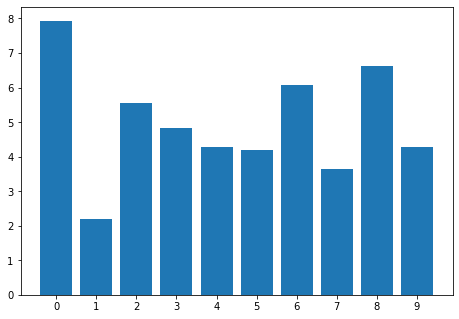

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,l_means)

As we can see there are some differences in intensity. The digit “1” is the less intense while the digit “0” is the most intense. So this new feature seems to have some predictive value if you wanted to know if say your digit is a “1” or not.

In [ ]:
#TODO compute average intensity for each data sample
intensity = np.zeros(shape=y.shape, dtype=float)
for i in range(len(X)):
  intensity[i] = np.mean(X[i])
print(intensity.shape)

(70000,)


*Sometimes* people really do not know what are they doing. I am not an exception:

In [ ]:
X_flip=np.flip(X)
symmetry= np.mean((X-X_flip),axis=1)
print(symmetry.shape)

(70000,)


I called this feature "symmetry" (though it's not "symmetry" at all). Use visualization method to understand why this thing works.

Our new trainning data will have 70000 samples and 2 features: intensity, symmetry.

In [ ]:
#TODO create X_new by horizontal stack intensity and symmetry
X_new = np.column_stack((intensity, symmetry)) #hstack: (140000), vstack(2, 70000)
print(X_new.shape) #it should be (70000,2)

(70000, 2)


## 2. Training 

Usually logistic regression is a good first choice for classification. In this homework we use logistic regression for classifying digit 1 images and not digit 1 images.

### Normalize data
First normalize data using Z-score normalization
- **TODO: Study about Z-score normalization**: Z-score normalization is a method of normalizing data that avoids outlier issue. The formula for z-score normalization is: (value - mean) / standard deviation
- **TODO: Why should we normalize data?** to avoid outlier issue

In [ ]:
#TODO: normalize X_new
X_new = (X_new - np.mean(X_new)) / np.std(X_new)
print(X_new)

[[ 0.85342722 -1.6193639 ]
 [ 1.06445354 -0.50547592]
 [ 0.37569199 -1.35218211]
 ...
 [ 0.95427061 -0.19502487]
 [ 0.79632598 -1.04173105]
 [ 1.69918763  0.07215692]]


### Construct  data

In [ ]:
X_new = np.hstack((np.ones((len(X_new), 1)), X_new)) #stack 1s column as usual
y_new=y.astype(int)
y_new[y_new != 1] = 0 # digit 1 -> class 1, other digits -> class 0
y_new=y_new.reshape(-1,1)
print (X_new.shape)
print (y_new.shape)

(70000, 3)
(70000, 1)


### Split data 

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, test_size= int(1/3*X.shape[0]))
print(train_X.shape)
print(train_y.shape)

(46667, 3)
(46667, 1)


### Sigmoid function and derivative of the sigmoid function

In [ ]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

### Compute output

In [ ]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(X.dot(W))
def predict(W, X):
 
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #........
    preds=sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

### Compute gradient

**Loss Function: Average negative log likelihood**
$$\mathcal{L}=\dfrac{1}{N} \sum_{i=1}^{N} -\left(y^{i}\ln h_{\mathbf{w}}\left(\mathbf{x}^{i}\right)+\left(1-y^{i}\right)\ln \left(1-h_{\mathbf{w}}\left(x^{i}\right)\right)\right) $$


$$\text{Sigmoid Activation: } z= \sigma \left(h\right)= \dfrac{1}{1+e^{-h}}$$

$$\text{Cross-entropy: } J(w)=-\left({ylog(z)+(1-y)log(1-z)}\right)$$

$$\text{Chain rule: } \dfrac{\partial J(w)}{\partial w}=\dfrac{\partial J(w)}{\partial z} \dfrac{\partial z}{\partial h}\dfrac{\partial h}{\partial w}  $$

$$\dfrac{\partial J(w)}{\partial z}=-\left(\dfrac{y}{z}-\dfrac{1-y}{1-z}\right)=\dfrac{z-y}{z(1-z)}$$

$$\dfrac{\partial z}{\partial h}=z(1-z)$$

$$\dfrac{\partial h}{\partial w}=X$$

$$\dfrac{\partial J(w)}{\partial w}=X^T(z-y)$$

In [ ]:
def compute_gradient(h, error):
    """
    This is the gradient descent update of "average negative loglikelihood" loss function. 
    In lab02 our loss function is "sum squared error".
    """
    #TODO
    gradient = train_X.T.dot(error) / len(train_X)
    return gradient

In [ ]:
def train(W,train_X, train_y, learning_rate, num_epochs, losses):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,train_X)
        error = h - train_y
        loss = np.mean(- train_y * np.log(h) - (1 - train_y) * np.log(1 - h))
        losses.append(loss)
        gradient=compute_gradient(h, error)
        W += -learning_rate * gradient
        if ((epoch+1)%1000==0): print ('Epoch %d, loss %.3f' %(epoch+1, loss))
        
    return W

### Train our model

In [ ]:
W = np.random.randn(train_X.shape[1], 1)
losses=[]
num_epochs=40000
learning_rate=0.01
W=train(W,train_X, train_y, learning_rate, num_epochs , losses)
x_preds=predict(W ,train_X)
train_err = np.mean(x_preds != train_y) * 100
print ('=' * 50)
print ('Train err of final w: ', train_err)

Epoch 1000, loss 0.295
Epoch 2000, loss 0.259
Epoch 3000, loss 0.242
Epoch 4000, loss 0.233
Epoch 5000, loss 0.228
Epoch 6000, loss 0.224
Epoch 7000, loss 0.221
Epoch 8000, loss 0.219
Epoch 9000, loss 0.217
Epoch 10000, loss 0.215
Epoch 11000, loss 0.214
Epoch 12000, loss 0.213
Epoch 13000, loss 0.212
Epoch 14000, loss 0.211
Epoch 15000, loss 0.211
Epoch 16000, loss 0.210
Epoch 17000, loss 0.209
Epoch 18000, loss 0.209
Epoch 19000, loss 0.208
Epoch 20000, loss 0.208
Epoch 21000, loss 0.207
Epoch 22000, loss 0.207
Epoch 23000, loss 0.207
Epoch 24000, loss 0.206
Epoch 25000, loss 0.206
Epoch 26000, loss 0.206
Epoch 27000, loss 0.205
Epoch 28000, loss 0.205
Epoch 29000, loss 0.205
Epoch 30000, loss 0.204
Epoch 31000, loss 0.204
Epoch 32000, loss 0.204
Epoch 33000, loss 0.204
Epoch 34000, loss 0.203
Epoch 35000, loss 0.203
Epoch 36000, loss 0.203
Epoch 37000, loss 0.203
Epoch 38000, loss 0.203
Epoch 39000, loss 0.203
Epoch 40000, loss 0.202
Train err of final w:  8.232798337154733


## 3. Evaluate our model

In [ ]:
preds = predict(W, train_X)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     41453
           1       0.74      0.41      0.52      5214

    accuracy                           0.92     46667
   macro avg       0.83      0.69      0.74     46667
weighted avg       0.91      0.92      0.91     46667



In [ ]:
preds = predict(W, test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     20670
           1       0.74      0.41      0.53      2663

    accuracy                           0.92     23333
   macro avg       0.84      0.70      0.74     23333
weighted avg       0.91      0.92      0.91     23333



**TODO: Comment on the result**: Because the percentage of loss of our training is quite low, so the classification table for both train and test are quite similar about result